In [2]:
import cv2
from PIL import Image
a = cv2.imread('.\data\id-00001000\example_data\class_0_example_0.png')
cv2.imshow('img1', a)
cv2.waitKey(0)
b = Image.fromarray(a)
b.show()

In [83]:
prob_dics = [{}, {}, {}, {}]  # for scale = 1.05, 1.1, 1.2, 1.3 
scale_idx = {'1.05': 0, '1.1': 1, '1.2':2, '1.3': 3}

for file in results:
    result_id = int(file[3:11])

    with open(os.path.join(result_path, file)) as f:
        
        for line in f.readlines():
            probs = line.split('\t')
            if probs[0] == 'scale':
                continue  # skip the first line
            _, scale, label, qt_25, qt_50, qt_75 = probs

            idx = scale_idx[scale]
        
            
            if label == '0':  # if the first label
                prob_dics[idx][result_id] = [[eval(qt_25)], [eval(qt_50)], [eval(qt_75)]]
            else:
                prob_dics[idx][result_id][0].append(eval(qt_25))
                prob_dics[idx][result_id][1].append(eval(qt_50))
                prob_dics[idx][result_id][2].append(eval(qt_75))
    

In [ ]:
################################
#####for clean model#############
################################

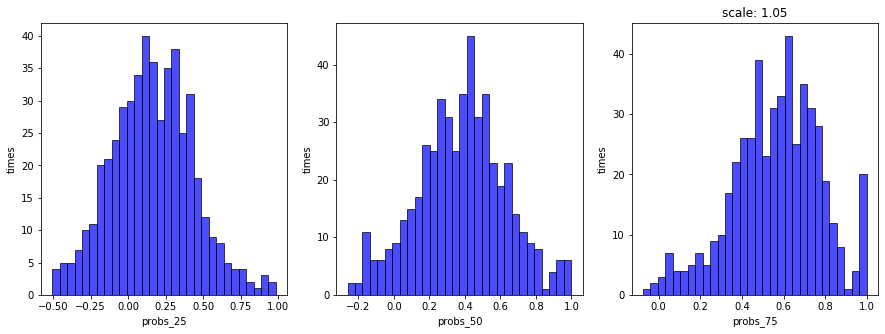

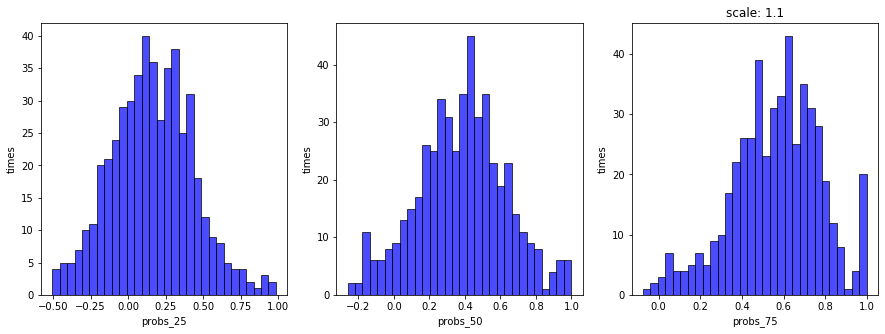

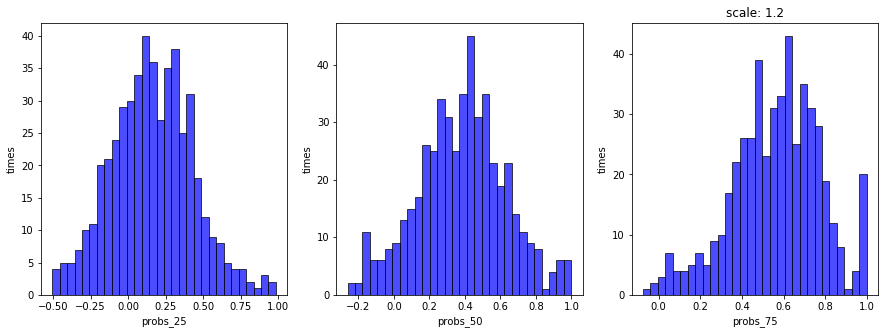

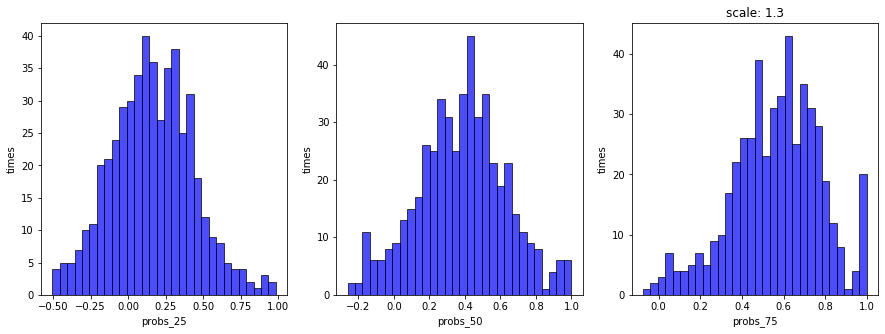

In [84]:
import matplotlib.pyplot as plt

scales = [1.05, 1.1, 1.2, 1.3]

# plot clean data
for idx in range(4):
    prob_dict = prob_dics[idx]
    probs_25, probs_50, probs_75 = [], [], []
    for (model_id, target) in target_dict.items():
        if target != 'None':
            continue
        prob_25, prob_50, prob_75 = prob_dict[model_id]
        probs_25 += prob_25
        probs_50 += prob_50
        probs_75 += prob_75
    plt.figure(idx+1, figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.hist(probs_25, bins=30, density=False, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xlabel('probs_25')
    plt.ylabel('times')
    
    plt.subplot(1, 3, 2)
    plt.hist(probs_50, bins=30, density=False, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xlabel('probs_50')
    plt.ylabel('times')
    
    plt.subplot(1, 3, 3)
    plt.hist(probs_75, bins=30, density=False, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xlabel('probs_75')
    plt.ylabel('times')
    plt.title('scale: {0}'.format(scales[idx]))
    plt.savefig('clean_{0}.png'.format(idx))


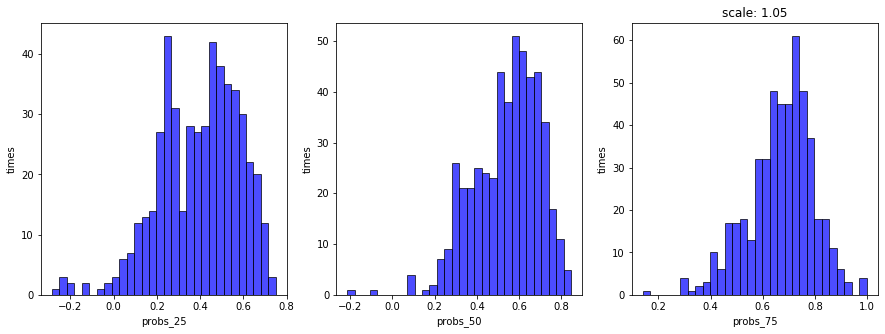

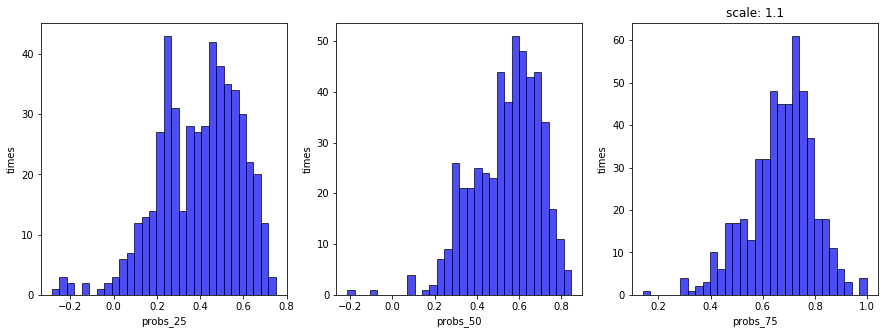

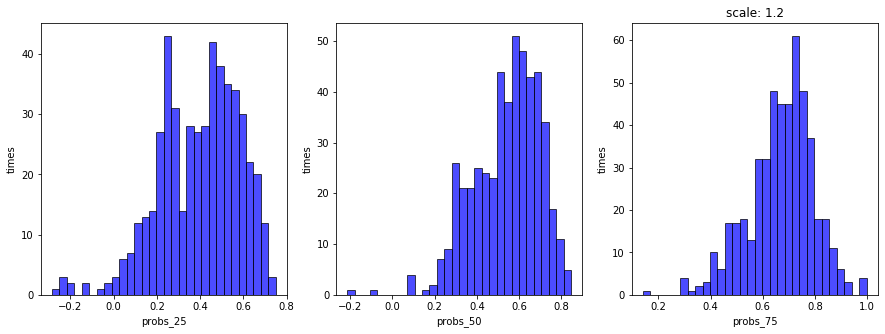

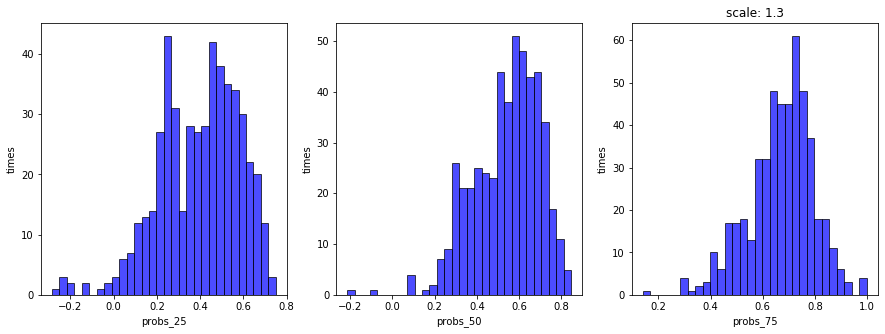

In [85]:
################################
#######for trojan model #######
##############################

scales = [1.05, 1.1, 1.2, 1.3]

# plot trojan data all
for idx in range(4):
    prob_dict = prob_dics[idx]
    probs_25, probs_50, probs_75 = [], [], []
    for (model_id, target) in target_dict.items():
        if target == 'None':
            continue
        prob_25, prob_50, prob_75 = prob_dict[model_id]
        probs_25 += prob_25
        probs_50 += prob_50
        probs_75 += prob_75
        
    plt.figure(idx+1, figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.hist(probs_25, bins=30, density=False, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xlabel('probs_25')
    plt.ylabel('times')
    
    plt.subplot(1, 3, 2)
    plt.hist(probs_50, bins=30, density=False, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xlabel('probs_50')
    plt.ylabel('times')
    
    plt.subplot(1, 3, 3)
    plt.hist(probs_75, bins=30, density=False, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xlabel('probs_75')
    plt.ylabel('times')
    plt.title('scale: {0}'.format(scales[idx]))
    plt.savefig('torjan_{0}.png'.format(idx))

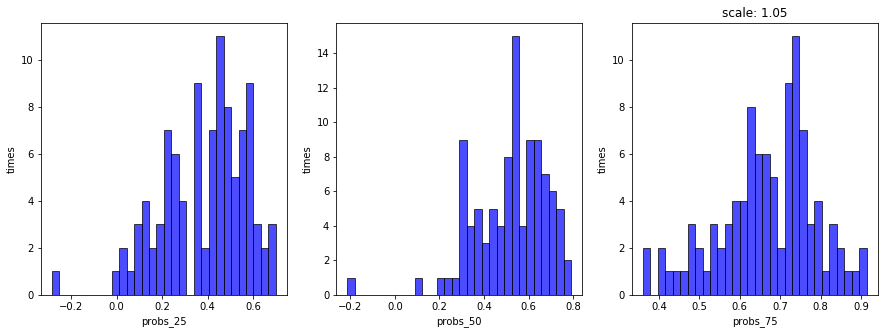

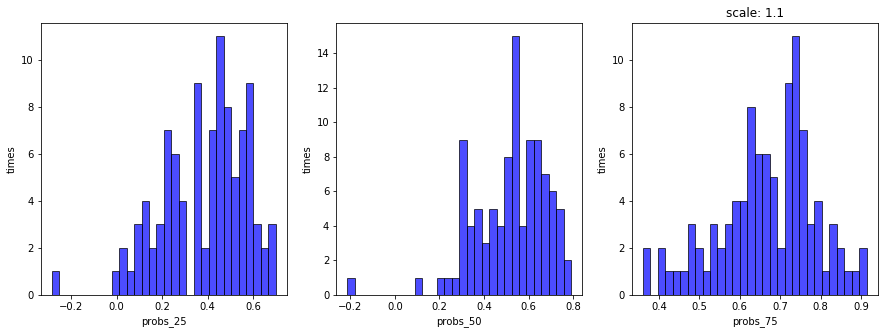

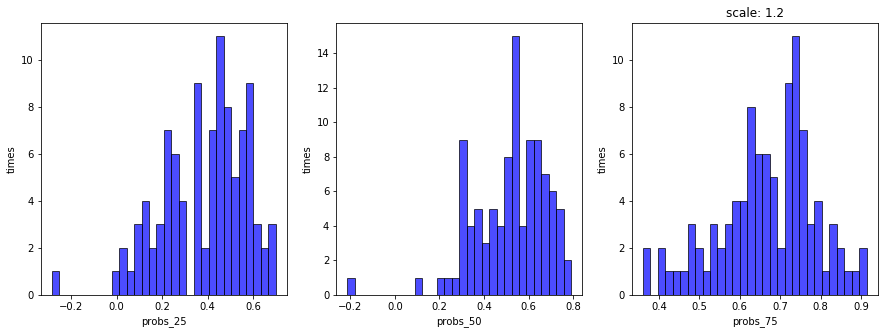

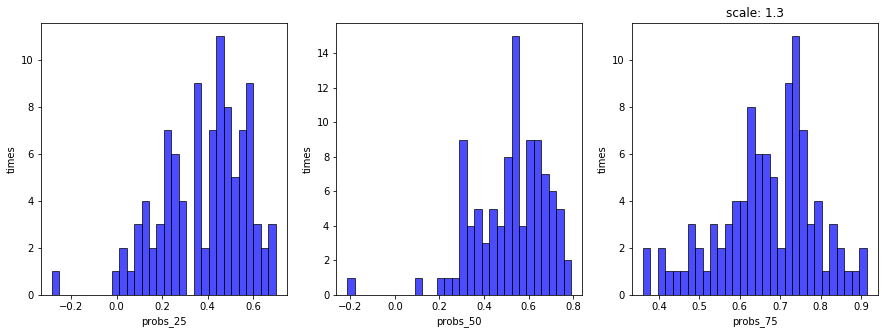

In [86]:
################################
#######for trojan label #######
##############################

scales = [1.05, 1.1, 1.2, 1.3]

# plot trojan data all
for idx in range(4):
    prob_dict = prob_dics[idx]
    probs_25, probs_50, probs_75 = [], [], []
    for (model_id, target) in target_dict.items():
        if target == 'None':
            continue
        target = eval(target)
        prob_25, prob_50, prob_75 = prob_dict[model_id]
        probs_25.append(prob_25[target])
        probs_50.append(prob_50[target])
        probs_75.append(prob_75[target])
        
    plt.figure(idx+1, figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.hist(probs_25, bins=30, density=False, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xlabel('probs_25')
    plt.ylabel('times')
    
    plt.subplot(1, 3, 2)
    plt.hist(probs_50, bins=30, density=False, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xlabel('probs_50')
    plt.ylabel('times')
    
    plt.subplot(1, 3, 3)
    plt.hist(probs_75, bins=30, density=False, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xlabel('probs_75')
    plt.ylabel('times')
    plt.title('scale: {0}'.format(scales[idx]))
    plt.savefig('target_{0}.png'.format(idx))

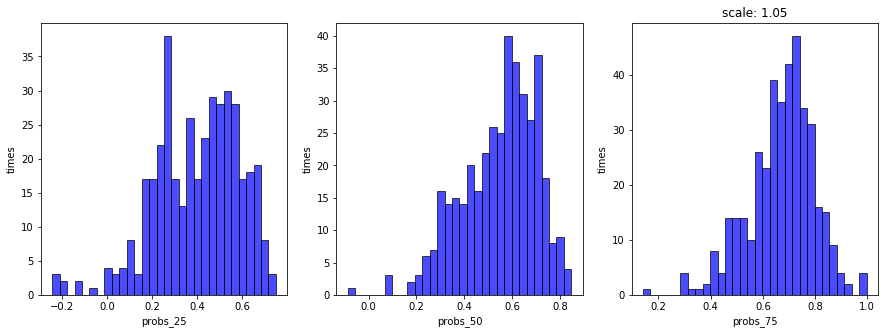

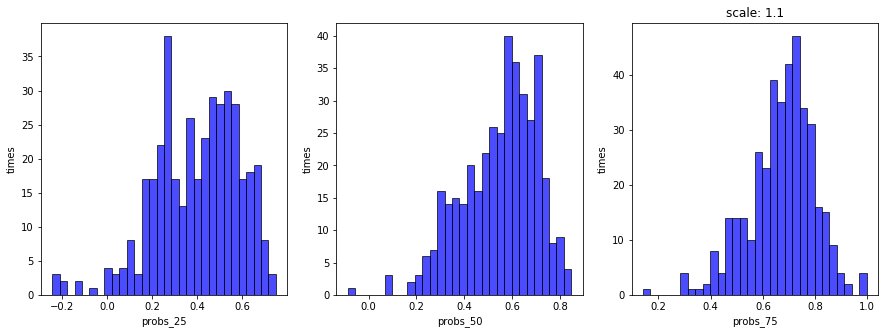

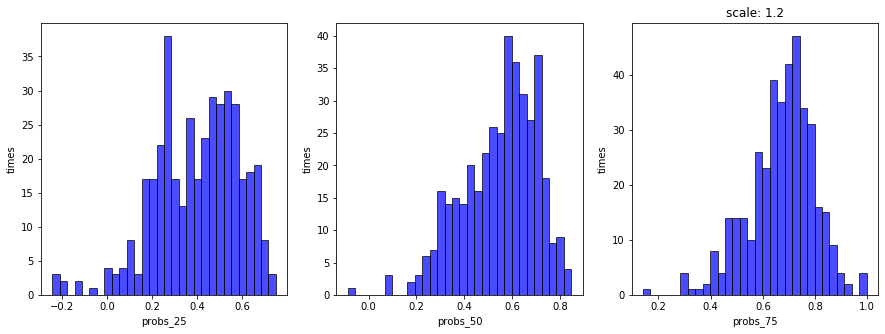

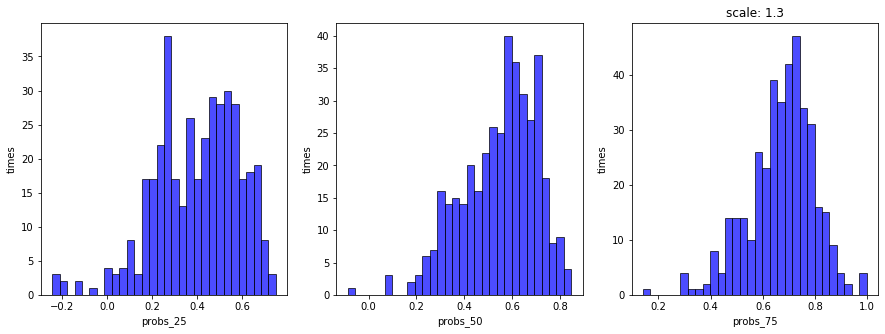

In [87]:
################################
#######for clean label in trojan model #######
##############################

scales = [1.05, 1.1, 1.2, 1.3]

# plot trojan data all
for idx in range(4):
    prob_dict = prob_dics[idx]
    probs_25, probs_50, probs_75 = [], [], []
    
    for (model_id, target) in target_dict.items():
        if target == 'None':
            continue
        target = eval(target)
        prob_25, prob_50, prob_75 = prob_dict[model_id]
        
        del prob_25[target]
        del prob_50[target]
        del prob_75[target]
        
        probs_25+=prob_25
        probs_50+=prob_50
        probs_75+=prob_75
        
    plt.figure(idx+1, figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.hist(probs_25, bins=30, density=False, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xlabel('probs_25')
    plt.ylabel('times')
    
    plt.subplot(1, 3, 2)
    plt.hist(probs_50, bins=30, density=False, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xlabel('probs_50')
    plt.ylabel('times')
    
    plt.subplot(1, 3, 3)
    plt.hist(probs_75, bins=30, density=False, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xlabel('probs_75')
    plt.ylabel('times')
    plt.title('scale: {0}'.format(scales[idx]))
    plt.savefig('Troj_clean_{0}.png'.format(idx))

In [1]:
a = [1, 2, 3, 4, 5]
print(a[-1])
a[-1]=6
print(a)

5
[1, 2, 3, 4, 6]


In [2]:
import numpy as np
a = np.array([1, 2, 3, 4, 5, 6])
print(a)
print(len(a))

[1 2 3 4 5 6]
6


In [9]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 2, 1, 1, 5])
c = np.where(np.equal(a, b))
print(c)
print(len(c[0]))

(array([0, 1, 4], dtype=int64),)
3


In [17]:
import json
import numpy as np
file = './id-00001048.json'
with open(file, 'r') as f:
    dict = json.load(f)
    output_p = np.array(dict['0']['output_p'])
    output = np.array(dict['0']['output'])
    cos = []
    for i in range(output.shape[0]):
        cos_similarity = np.dot(output_p[i], np.transpose(output[i]))\
                                 / (np.linalg.norm(output_p[i])*np.linalg.norm(output[i]))
        cos.append(cos_similarity)
        print(cos_similarity)
    print('-------------')
    print(np.quantile(cos, 0.15))

0.5672500611770396
0.4106281830856726
0.9864038233110874
0.42007597115206086
0.7904707912500055
0.8651683581452103
0.6105215394004776
0.4059330455577556
0.8974832471817517
0.7222470935402234
0.7908996720578729
0.4662504645624226
0.7350222084036291
0.5154011831265574
0.9259777575562684
0.7145166703443288
0.7382517207510079
0.7422507201922997
0.8444622764988043
0.9574587430491773
0.6690234411990164
0.8469902588003023
0.6864998264672414
0.974291468990033
0.6932000356279213
0.3885741423034299
0.8155515779897105
0.7292744867114712
0.7511100085761626
0.09848765498005081
0.967344498640891
0.6737407473918311
0.8423940532915577
0.6513332632947447
0.8580687473145885
0.8882336242180069
0.836313691399301
0.7219050017014769
0.7853899095000912
0.7371199210417531
0.8662428435677909
0.8932443502370947
0.6535262124856335
0.6693427556276925
0.8931549168123598
0.9674563433910792
0.9192573119022226
0.7394603228041161
0.6363970072720676
0.7954057504815357
-------------
0.5823950785552429
